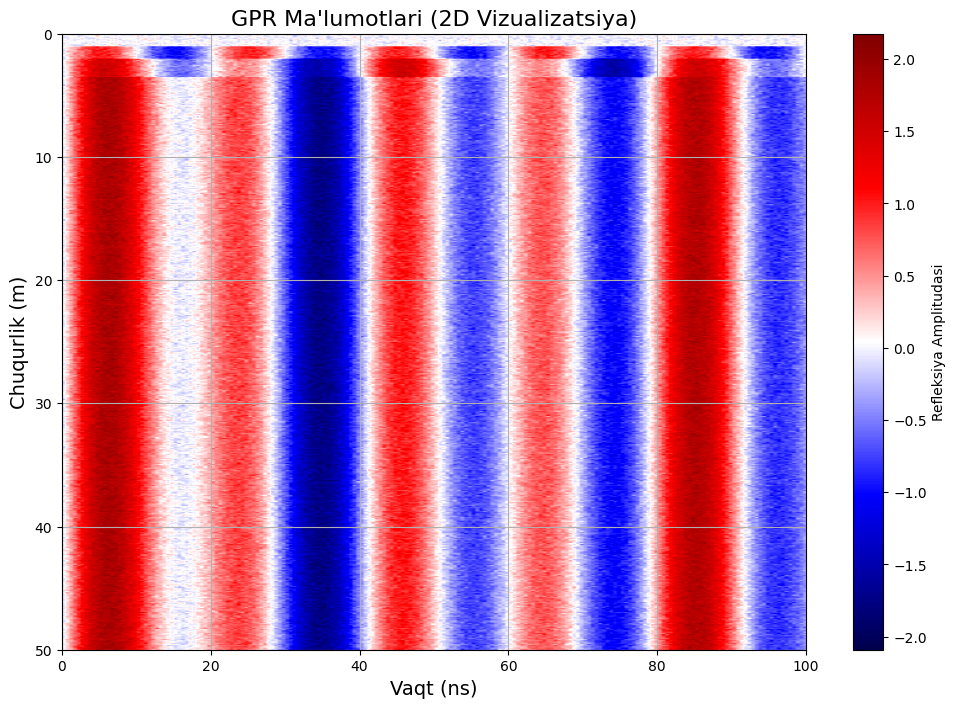

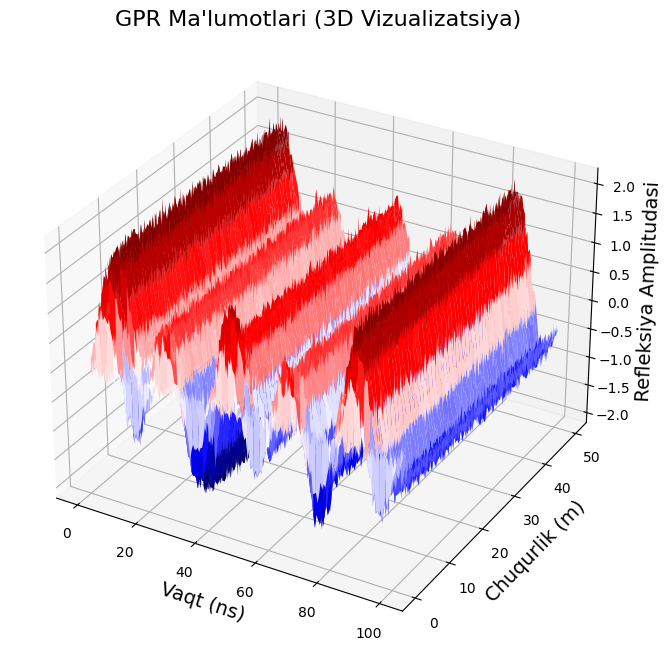

Aniqlangan qatlamlarning chuqurliklari: [1.0020040080160322, 1.1022044088176353, 1.2024048096192386, 1.3026052104208417, 1.402805611222445, 1.503006012024048, 1.6032064128256514, 1.7034068136272547, 1.8036072144288577, 1.903807615230461, 2.0040080160320644, 2.1042084168336674, 2.2044088176352705, 2.3046092184368736, 2.404809619238477, 2.50501002004008, 2.6052104208416833, 2.705410821643287, 2.80561122244489, 2.905811623246493, 3.006012024048096, 3.1062124248496996, 3.2064128256513027, 3.306613226452906, 3.4068136272545093, 3.5070140280561124, 3.6072144288577155, 3.7074148296593186, 3.807615230460922, 3.907815631262525, 4.008016032064129, 4.108216432865731, 4.208416833667335, 4.308617234468938, 4.408817635270541, 4.509018036072145, 4.609218436873747, 4.709418837675351, 4.809619238476954, 4.909819639278557, 5.01002004008016, 5.110220440881764, 5.210420841683367, 5.31062124248497, 5.410821643286574, 5.511022044088176, 5.61122244488978, 5.711422845691383, 5.811623246492986, 5.9118236472945

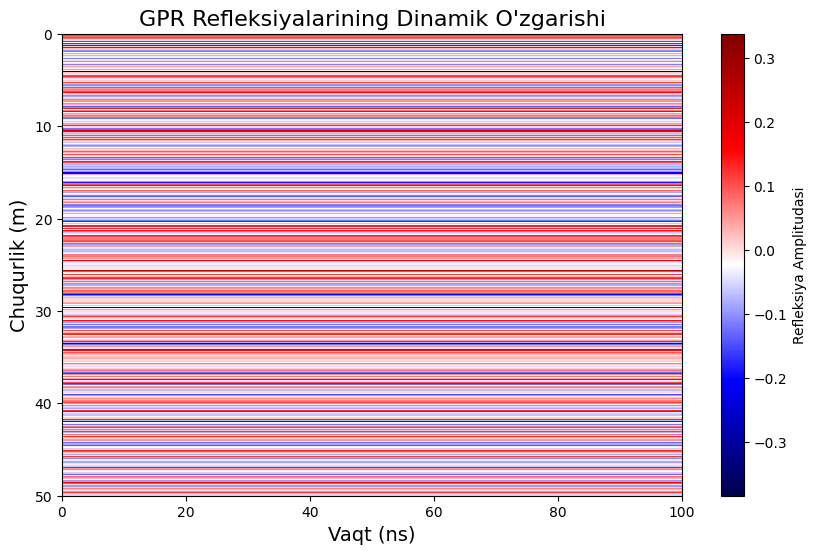

In [8]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. GPR Ma'lumotlarini Tayyorlash
np.random.seed(42)  # Natijalarni qayta tiklash uchun
depth = np.linspace(0, 50, 500)  # Chuqurlik (m)
time = np.linspace(0, 100, 200)  # Vaqt (ns)

# Qatlamlarni simulyatsiya qilish
layers = [10, 20, 35]  # Qatlam chuqurliklari (m)
amplitudes = [1, 0.7, 0.5]  # Qatlamlarning reﬂeksiya kuchi
data = np.zeros((len(depth), len(time)))

for i, layer in enumerate(layers):
    data[layer:, :] += amplitudes[i] * np.sin(2 * np.pi * time / (20 * (i + 1)))

# Shovqin qo'shish
data += np.random.normal(0, 0.1, data.shape)

# Ma'lumotlarni DataFrame shaklida saqlash
gpr_df = pd.DataFrame(data, index=depth, columns=time)

# 2. Ma'lumotlarni Vizualizatsiya qilish (2D Grafik)
plt.figure(figsize=(12, 8))
plt.imshow(data, extent=[time.min(), time.max(), depth.max(), depth.min()], 
           aspect='auto', cmap='seismic')
plt.colorbar(label='Reﬂeksiya Amplitudasi')
plt.title("GPR Ma'lumotlari (2D Vizualizatsiya)", fontsize=16)
plt.xlabel("Vaqt (ns)", fontsize=14)
plt.ylabel("Chuqurlik (m)", fontsize=14)
plt.grid()
plt.show()

# 3. 3D Grafikni Yaratish
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(time, depth)
ax.plot_surface(X, Y, data, cmap='seismic', edgecolor='none')
ax.set_title("GPR Ma'lumotlari (3D Vizualizatsiya)", fontsize=16)
ax.set_xlabel("Vaqt (ns)", fontsize=14)
ax.set_ylabel("Chuqurlik (m)", fontsize=14)
ax.set_zlabel("Reﬂeksiya Amplitudasi", fontsize=14)
plt.show()

# 4. GPR Ma'lumotlarini Tahlil Qilish
threshold = 0.5  # Reﬂeksiya uchun minimal amplituda
layers_detected = []

for i, depth_value in enumerate(depth):
    if np.max(data[i, :]) > threshold:
        layers_detected.append(depth_value)

print(f"Aniqlangan qatlamlarning chuqurliklari: {layers_detected}")

# 5. (Ixtiyoriy) Animatsiya Yaratish
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.imshow(data[:, 0:1], extent=[time.min(), time.max(), depth.max(), depth.min()], 
                 aspect='auto', cmap='seismic', animated=True)

# Colorbar ni yaratish uchun `imshow` objekti kerak
cbar = plt.colorbar(cax, ax=ax)
cbar.set_label('Reﬂeksiya Amplitudasi')

def update(frame):
    cax.set_data(data[:, :frame])  # Dinamik tarzda ma'lumotni yangilash
    return [cax]

ani = FuncAnimation(fig, update, frames=range(1, len(time)), blit=True)
plt.title("GPR Reﬂeksiyalarining Dinamik O'zgarishi", fontsize=16)
plt.xlabel("Vaqt (ns)", fontsize=14)
plt.ylabel("Chuqurlik (m)", fontsize=14)
plt.show()
